In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mediapipe


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
draw_landmarks(frame, results)

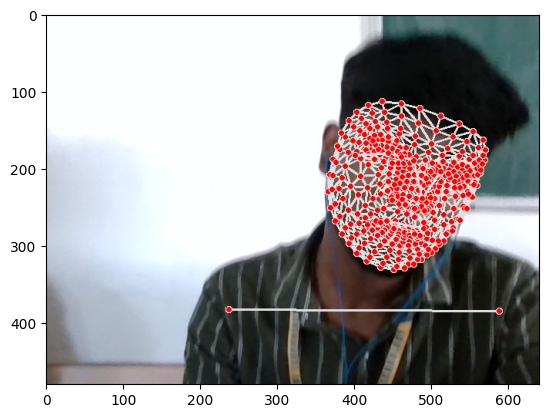

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Example usage
result_test = extract_keypoints(results)
np.save('0.npy', result_test)  # Save keypoints
loaded_keypoints = np.load('0.npy')  # Load keypoints
print(loaded_keypoints)


[ 0.76404703  0.49802989 -1.13302112 ...  0.          0.
  0.        ]


In [ ]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'MP_Data'

# Actions that we try to detect
actions = np.array(['hello','iloveyou'])  # Update this list as needed

# Number of sequences per action
no_sequences = 30

# Length of each sequence (in frames)
sequence_length = 30

# Ensure the main directory exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Create folders for storing the data
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    os.makedirs(action_path, exist_ok=True)

    # Find the highest numbered subdirectory
    try:
        dirmax = np.max([int(f) for f in os.listdir(action_path) if f.isdigit()])
    except ValueError:
        dirmax = 0  # Default to 0 if there are no subdirectories

    for sequence in range(1, no_sequences + 1):
        os.makedirs(os.path.join(action_path, str(dirmax + sequence)), exist_ok=True)

print("Directories created successfully.")


In [ ]:
import os
import numpy as np
import mediapipe as mp
import cv2

# Initialize mediapipe and OpenCV
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Function to perform MediaPipe detection
def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model.process(image_rgb)
    image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    return image_rgb, results

# Function to draw landmarks on the image
def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Function to extract keypoints from MediaPipe results
def extract_keypoints(results):
    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])
    return np.array(keypoints)

# Parameters
actions = np.array(['hello','iloveyou'])  # Must match the actions used in directory creation
no_sequences = 30
sequence_length = 30
DATA_PATH = 'MP_Data'

# Start video capture
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()

# Initialize MediaPipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, no_sequences + 1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if not ret:
                    print("Error: Could not read frame.")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                  
    cap.release()
    cv2.destroyAllWindows()


In [22]:
pip install scikit-image



   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.9 MB 1.9 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.9 MB 3.1 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/12.9 MB 3.3 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.9 MB 3.5 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.9 MB 3.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/12.9 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.9 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 3.5 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.9 MB 3.0 MB/s eta 0:00:03
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import TensorBoard
from skimage.transform import resize

# Define constants
DATA_PATH = 'MP_Data'
actions = np.array(['hello', 'iloveyou'])  # Example actions
sequence_length = 30  # Define the sequence length for LSTM input
target_size = (64, 64)  # Example target size for resizing, (height, width)

# Create a mapping of actions to labels
label_map = {label: num for num, label in enumerate(actions)}

def preprocess_frame(frame_path, target_size):
    """
    Load and preprocess a single frame. Adjust this if you are not working with images.
    """
    frame = np.load(frame_path)  # Adjust if using a different data format
    if frame.shape[:2] != target_size:
        # Resize the frame if it's not the expected shape (if dealing with images)
        try:
            frame = resize(frame, target_size, mode='reflect', anti_aliasing=True)
        except Exception as e:
            print(f"Error resizing frame {frame_path}: {e}")
            frame = np.zeros((target_size[0], target_size[1]))  # Placeholder to avoid breaking
    return frame

def load_data(DATA_PATH, actions, sequence_length, target_size):
    sequences, labels = [], []

    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        for sequence in sorted(os.listdir(action_path)):
            sequence_path = os.path.join(action_path, sequence)
            window = []
            for frame_num in range(sequence_length):
                frame_path = os.path.join(sequence_path, f"{frame_num}.npy")
                if os.path.exists(frame_path):
                    try:
                        res = preprocess_frame(frame_path, target_size)
                        if res.shape[:2] == target_size:
                            window.append(res)
                        else:
                            print(f"Frame {frame_path} has unexpected shape: {res.shape}")
                            break
                    except Exception as e:
                        print(f"Error processing {frame_path}: {e}")
                        break
                else:
                    print(f"Missing frame: {frame_path}")
                    break
            if len(window) == sequence_length:
                sequences.append(np.array(window))
                labels.append(label_map[action])

    return np.array(sequences), np.array(labels)

# Load and preprocess data
X, y = load_data(DATA_PATH, actions, sequence_length, target_size)

# Check the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=len(actions)).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Define paths for TensorBoard logs
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Create the model
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=(sequence_length, *target_size, 1)))
model.add(TimeDistributed(MaxPooling2D((2, 2), padding='same')))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D((2, 2), padding='same')))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D((2, 2), padding='same')))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Print model summary to check layers and output shapes
model.summary()

# Fit the model
try:
    model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback], validation_data=(X_test, y_test))
except ValueError as e:
    print("ValueError:", e)
    print("Check the shape of your input data and model definition.")


c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\transform\_warps.py:202: RuntimeWarning: divide by zero encountered in scalar divide
  zoom_factors = [1 / f for f in factors]
c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\ndimage\_interpolation.py:815: RuntimeWarning: invalid value encountered in scalar multiply
  [int(round(ii * jj)) for ii, jj in zip(input.shape, zoom)])


Error resizing frame MP_Data\hello\17\14.npy: cannot convert float NaN to integer
X shape: (60, 30, 64, 64)
y shape: (60,)
X_train shape: (57, 30, 64, 64)
X_test shape: (3, 30, 64, 64)
y_train shape: (57, 2)
y_test shape: (3, 2)


c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 30, 64, 64, 32) │           320 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 32, 32, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 30, 32, 32, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 30, 16, 16, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 30, 16, 16,     │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 30, 8, 8, 128)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 30, 8192)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 64)         │     2,113,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,360,994 (9.01 MB)

 Trainable params: 2,360,994 (9.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 92s 41s/step - categorical_accuracy: 0.5058 - loss: 0.6931 - val_categorical_accuracy: 0.3333 - val_loss: 0.7040
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 83s 42s/step - categorical_accuracy: 0.5163 - loss: 0.6929 - val_categorical_accuracy: 0.6667 - val_loss: 0.6386
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 89s 38s/step - categorical_accuracy: 0.5267 - loss: 0.6869 - val_categorical_accuracy: 0.3333 - val_loss: 26.8057
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 76s 31s/step - categorical_accuracy: 0.4733 - loss: 16.8430 - val_categorical_accuracy: 0.6667 - val_loss: 0.6664
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 74s 35s/step - categorical_accuracy: 0.4525 - loss: 0.7612 - val_categorical_accuracy: 0.6667 - val_loss: 0.6786
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 81s 33s/step - categorical_accuracy: 0.5358 - loss: 0.6863 - val_categorical_accuracy: 0.6667 - val_loss: 0.6872
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 77s 32s/step - categorical_accuracy: 0.4942 - loss: 0.6926 - 

: 